In [ ]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import tensorflow as tf
import missingno as msno
import math
%matplotlib inline


df = pd.read_csv('/content/drive/My Drive/Mini Project-Sepsis/cleaned.csv')
temp = df
df = df.iloc[:, 2:]
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Glucose,Gender,ICULOS,SepsisLabel
0,106.0,100.0,36.78,126.0,69.0,50.5,32.0,18.0,65.0,0,1,0
1,85.0,100.0,36.10,117.0,90.0,74.0,11.0,38.5,305.0,0,2,0
2,89.5,100.0,36.55,122.5,93.0,75.5,9.5,31.0,106.0,0,3,0
3,97.0,99.0,36.70,127.0,97.0,79.0,12.0,26.0,242.0,0,4,0
4,90.0,98.0,37.00,110.0,85.0,70.0,14.0,25.0,212.0,0,5,0


In [ ]:
df = df.astype({"Gender" : 'category', "SepsisLabel" : 'category'})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56110 entries, 0 to 56109
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   HR           56110 non-null  float64 
 1   O2Sat        56110 non-null  float64 
 2   Temp         56110 non-null  float64 
 3   SBP          56110 non-null  float64 
 4   MAP          56110 non-null  float64 
 5   DBP          56110 non-null  float64 
 6   Resp         56110 non-null  float64 
 7   EtCO2        56110 non-null  float64 
 8   Glucose      56110 non-null  float64 
 9   Gender       56110 non-null  category
 10  ICULOS       56110 non-null  int64   
 11  SepsisLabel  56110 non-null  category
dtypes: category(2), float64(9), int64(1)
memory usage: 4.4 MB
None


In [ ]:
for i in range(df.shape[1]) :
    if i == 9 or i == 11 :
        continue 
    else:
        df.iloc[:, i] = (df.iloc[:, i] - min(df.iloc[:, i])) / (max(df.iloc[:, i]) - min(df.iloc[:, i]))
df.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Glucose,Gender,ICULOS,SepsisLabel
0,0.5300,1.00,0.908148,0.450000,0.231544,0.175958,0.336842,0.272727,0.088677,0,0.025,0
1,0.4250,1.00,0.891358,0.417857,0.302013,0.257840,0.115789,0.583333,0.416098,0,0.050,0
2,0.4475,1.00,0.902469,0.437500,0.312081,0.263066,0.100000,0.469697,0.144611,0,0.075,0
3,0.4850,0.99,0.906173,0.453571,0.325503,0.275261,0.126316,0.393939,0.330150,0,0.100,0
4,0.4500,0.98,0.913580,0.392857,0.285235,0.243902,0.147368,0.378788,0.289222,0,0.125,0
5,0.4300,0.97,0.916049,0.382143,0.278523,0.240418,0.105263,0.636364,0.233288,0,0.150,1
6,0.4350,0.93,0.918519,0.400000,0.268456,0.236934,0.147368,0.530303,0.230559,0,0.175,1
7,0.4400,0.98,0.913580,0.425000,0.299765,0.250871,0.052632,0.575758,0.166439,0,0.200,1
8,0.4350,1.00,0.913580,0.446429,0.308725,0.254355,0.142105,0.462121,0.129604,0,0.225,1
9,0.4300,0.99,0.911111,0.425000,0.302013,0.250871,0.042105,0.681818,0.334243,0,0.250,1


In [ ]:
df1 = df
y = []
ct = 0; t1 = 0; t2 = 0
while(ct <= 56109):
    if ct > 60000:
        print("Sorry\n")
        break
    f = 0;
    for j in range(ct, ct+31, 1):
        if df1.iloc[j, -1] == 1:
            f = 1
            break
        # print(j, end = ' ')
    # print("\n")
    if f == 1:
        y.append(1)
        t1 += 1
    else:
        y.append(0)
        t2 += 1
    ct += 31
X = np.array(df1.iloc[:, 0:11].to_numpy().reshape(1810, 31, 11))
y = np.array(y).reshape(1810)

X_train = np.array(df1.iloc[0:42098, 0:11])
X_test = np.array(df1.iloc[42098:, 0:11])
y_train = y[0:1358]
y_test = y[1358:1810]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

X_train = X_train.reshape(1358, 31, 11)
X_test = X_test.reshape(452, 31, 11)
y_train = y_train.reshape(1358) 
y_test = y_test.reshape(452)


In [ ]:
print(t1, " ", t2)

1308   502


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape = (31, 11), return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, shuffle=False)

34/34 [==============================] - 3s 99ms/step - loss: 0.5078 - accuracy: 0.7680 - val_loss: 0.5860 - val_accuracy: 0.6213
Epoch 2/10
34/34 [==============================] - 3s 75ms/step - loss: 0.4198 - accuracy: 0.7901 - val_loss: 0.5518 - val_accuracy: 0.6213
Epoch 3/10
34/34 [==============================] - 3s 76ms/step - loss: 0.3867 - accuracy: 0.7901 - val_loss: 0.5372 - val_accuracy: 0.6213
Epoch 4/10
34/34 [==============================] - 3s 76ms/step - loss: 0.3751 - accuracy: 0.7901 - val_loss: 0.5460 - val_accuracy: 0.6213
Epoch 5/10
34/34 [==============================] - 3s 77ms/step - loss: 0.3617 - accuracy: 0.7901 - val_loss: 0.4943 - val_accuracy: 0.6213
Epoch 6/10
34/34 [==============================] - 3s 76ms/step - loss: 0.3628 - accuracy: 0.7901 - val_loss: 0.5443 - val_accuracy: 0.6213
Epoch 7/10
34/34 [==============================] - 3s 76ms/step - loss: 0.3658 - accuracy: 0.7901 - val_loss: 0.4990 - val_accuracy: 0.6213
Epoch 8/10
34/34 [======

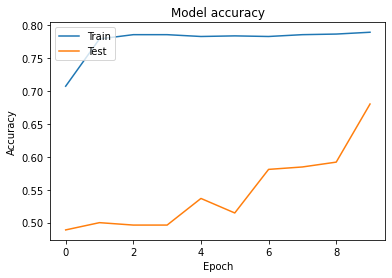

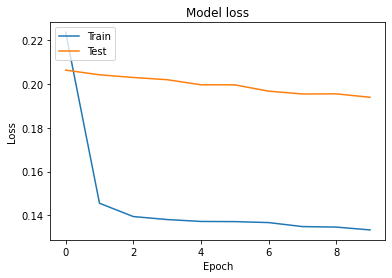

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

from collections import Counter
from scipy import stats

dist = Counter(y)
for k in dist:
    print(k)
    dist[k] /= len(X)

acum = 0
bound = {}
for i in range(1):
    acum += dist[i]
    bound[i] = np.percentile(y_pred, acum * 100)
print(bound)

def classify(x):
    if x <= bound[0]:
        return 0
    else:
        return 1

final_pred = np.array(list(map(classify, y_pred)))
print(final_pred)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, final_pred))
print (classification_report(y_test,final_pred))

1
0
{0: 0.5663874038016599}
[1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 1]
[[ 95  76]
 [ 31 250]]
              precision    reca

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape = (31, 11), return_sequences=True),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(rate = 0.2),
    # tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()
history = model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/500
34/34 [==============================] - 1s 42ms/step - loss: 0.6007 - accuracy: 0.7505 - val_loss: 0.7014 - val_accuracy: 0.6213
Epoch 2/500
34/34 [==============================] - 1s 23ms/step - loss: 0.4751 - accuracy: 0.7864 - val_loss: 0.5888 - val_accuracy: 0.6213
Epoch 3/500
34/34 [==============================] - 1s 23ms/step - loss: 0.4297 - accuracy: 0.7891 - val_loss: 0.5836 - val_accuracy: 0.6213
Epoch 4/500
34/34 [==============================] - 1s 26ms/step - loss: 0.4064 - accuracy: 0.7901 - val_loss: 0.5484 - val_accuracy: 0.6213
Epoch 5/500
34/34 [==============================] - 1s 23ms/step - loss: 0.3880 - accuracy: 0.7845 - val_loss: 0.5195 - val_accuracy: 0.6213
Epoch 6/500
34/34 [==============================] - 1s 24ms/step - loss: 0.3918 - accuracy: 0.7882 - val_loss: 0.5358 - val_accuracy: 0.6213
Epoch 7/500
34/34 [==============================] - 1s 24ms/step - loss: 0.3598 - accuracy: 0.7901 - val_loss: 0.5129 - val_accuracy: 0.6213
Epoch 

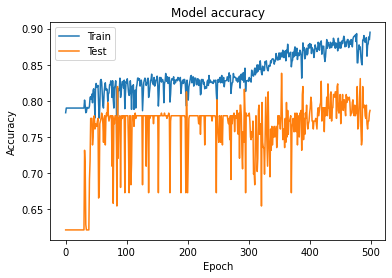

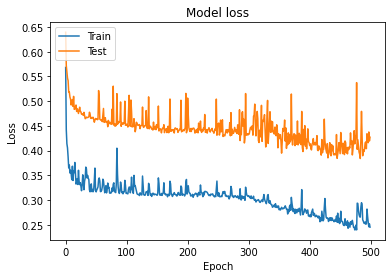

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

from collections import Counter
from scipy import stats

dist = Counter(y)
for k in dist:
    print(k)
    dist[k] /= len(X)

acum = 0
bound = {}
for i in range(1):
    acum += dist[i]
    bound[i] = np.percentile(y_pred, acum * 100)
print(bound)

def classify(x):
    if x <= bound[0]:
        return 0
    else:
        return 1

final_pred = np.array(list(map(classify, y_pred)))
print(final_pred)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, final_pred))
print (classification_report(y_test,final_pred))

1
0
{0: 0.4898267097236043}
[1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0
 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0
 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1
 1 1 0 1 1 0 0 1]
[[100  71]
 [ 26 255]]
              precision    reca

In [ ]:

######### ROUGH FLASK ###################

# import pickle
# from keras.models import load_model
# model.save("model.h5")
# model = load_model('model.h5')

model.predict([np.array(df.iloc[279:310, 0:11]).tolist()])

array([[0.08939612]], dtype=float32)

Epoch 1/500
34/34 [==============================] - 2s 53ms/step - loss: 0.5262 - accuracy: 0.7790 - val_loss: 0.6167 - val_accuracy: 0.6213
Epoch 2/500
34/34 [==============================] - 1s 28ms/step - loss: 0.4262 - accuracy: 0.7901 - val_loss: 0.5633 - val_accuracy: 0.6213
Epoch 3/500
34/34 [==============================] - 1s 29ms/step - loss: 0.4058 - accuracy: 0.7901 - val_loss: 0.5418 - val_accuracy: 0.6213
Epoch 4/500
34/34 [==============================] - 1s 29ms/step - loss: 0.3911 - accuracy: 0.7901 - val_loss: 0.5334 - val_accuracy: 0.6213
Epoch 5/500
34/34 [==============================] - 1s 27ms/step - loss: 0.3776 - accuracy: 0.7901 - val_loss: 0.5238 - val_accuracy: 0.6213
Epoch 6/500
34/34 [==============================] - 1s 27ms/step - loss: 0.3757 - accuracy: 0.7901 - val_loss: 0.5156 - val_accuracy: 0.6213
Epoch 7/500
34/34 [==============================] - 1s 28ms/step - loss: 0.3634 - accuracy: 0.7901 - val_loss: 0.5201 - val_accuracy: 0.6213
Epoch 

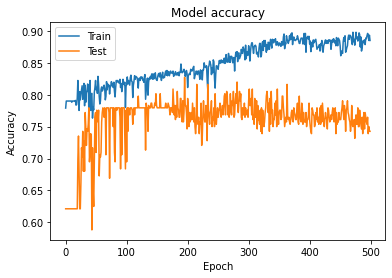

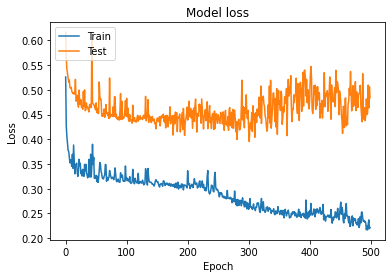

1
0
{0: 0.4113347394690329}
[1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 1]
[[101  70]
 [ 25 256]]
              precision    reca

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape = (31, 11), return_sequences=True),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(rate = 0.2),
    # tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()
history = model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2, shuffle=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

y_pred = model.predict(X_test)

from collections import Counter
from scipy import stats

dist = Counter(y)
for k in dist:
    print(k)
    dist[k] /= len(X)

acum = 0
bound = {}
for i in range(1):
    acum += dist[i]
    bound[i] = np.percentile(y_pred, acum * 100)
print(bound)

def classify(x):
    if x <= bound[0]:
        return 0
    else:
        return 1

final_pred = np.array(list(map(classify, y_pred)))
print(final_pred)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, final_pred))
print (classification_report(y_test,final_pred))


In [ ]:
# model.save("model1.h5") 0.568

In [ ]:
import pickle
from keras.models import load_model
# model.save("model.h5")
model = load_model('model1.h5')
